# 图像处理+180776+胡欣毅(Python版)

## 1. 题目清单

1. 如何利用图像的边缘或SIFT或SURF特征，让模糊的图像变清晰。


## 2. 解答 

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline

In [2]:
def getImageVar(image):
    img2gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    imageVar = cv2.Laplacian(image, cv2.CV_64F).var()
    return imageVar

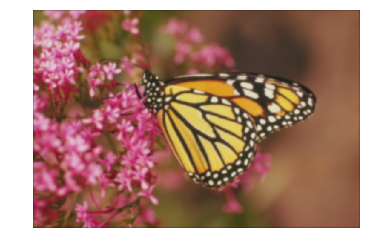

24.93315397304654

In [3]:
image = cv2.imread('../hudie/3.bmp')
im = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image , cv2.COLOR_RGB2GRAY)
plt.imshow(im)
plt.axis("off")#去除坐标轴
plt.show()
getImageVar(im)

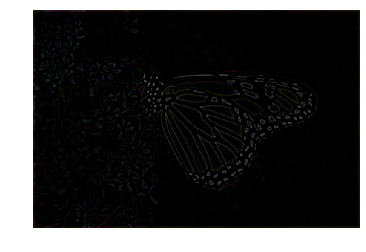

In [4]:
#边缘检测
kernel_1 = np.array([[-1,-1,-1],
                     [-1,8,-1],
                     [-1,-1,-1]])
edges = cv2.filter2D(image,-1,kernel_1)
cv2.imwrite("edges.jpg",edges)
edges = cv2.cvtColor(edges,cv2.COLOR_BGR2RGB)
plt.imshow(edges)
plt.axis("off")# 去除坐标轴
plt.show()

原图加上边缘部分，强化边缘，实现图片增强

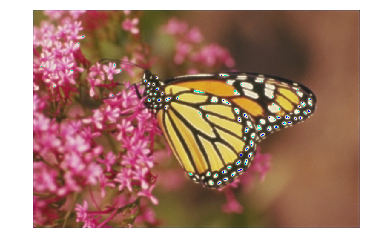

743.8130453338869

In [5]:
imag = image + edges
cv2.imwrite("imag.jpg",imag)
imag = cv2.cvtColor(imag,cv2.COLOR_BGR2RGB)
plt.imshow(imag,cmap='gray')
plt.axis("off")# 去除坐标轴
plt.show()
getImageVar(imag)

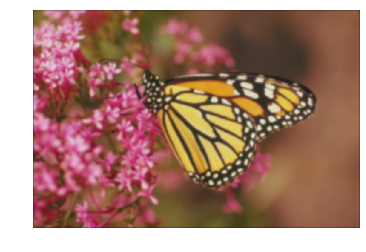

12.151280508822191

In [6]:
#低通滤波器
kernel_2=np.array([[1,1,1],
                  [1,1,1],
                  [1,1,1]])/9.0
rect=cv2.filter2D(image,-1,kernel_2)
cv2.imwrite("rect.jpg",rect)
rect = cv2.cvtColor(rect,cv2.COLOR_BGR2RGB)
plt.imshow(rect,cmap='gray')
plt.axis("off")#去除坐标轴
plt.show()
getImageVar(rect)

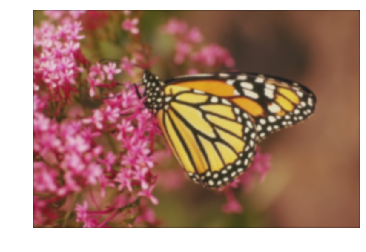

11.082615003954862

In [7]:
#高斯滤波器
kernel_3=np.array([[1,4,7,4,1],
                  [4,16,26,16,4],
                  [7,26,41,26,7],
                  [4,16,26,16,4],
                  [1,4,7,4,1]])/273.0

gaussian=cv2.filter2D(image,-1,kernel_3)
cv2.imwrite("gaussian.jpg",gaussian)
gaussian = cv2.cvtColor(gaussian,cv2.COLOR_BGR2RGB)
plt.imshow(gaussian,cmap='gray')
plt.axis("off")#去除坐标轴
plt.show()
getImageVar(gaussian)

第一个锐化卷积核可以理解成
$$ \begin{bmatrix}
-1 & -1 & -1\\ 
-1 & 9 & -1 \\ 
-1 & -1 & -1
\end{bmatrix}  = \begin{bmatrix}
-1 & -1 & -1\\ 
-1 & 8 & -1 \\ 
-1 & -1 & -1
\end{bmatrix} + \begin{bmatrix}
0 & 0 & 0\\ 
0 & 1 & 0\\ 
0 & 0 & 0
\end{bmatrix} $$
左边是边缘提取卷积核，右边是原图

In [8]:
#锐化滤波器
kernel_sharpen_1 = np.array([
        [-1,-1,-1],
        [-1,9,-1],
        [-1,-1,-1]])
kernel_sharpen_2 = np.array([
        [0,-2,0],
        [-2,9,-2],
        [0,-2,0]])
kernel_sharpen_3 = np.array([
        [-1,-1,-1,-1,-1],
        [-1,2,2,2,-1],
        [-1,2,8,2,-1],
        [-1,2,2,2,-1], 
        [-1,-1,-1,-1,-1]])/8.0

In [9]:
#卷积
output_1 = cv2.filter2D(image,-1,kernel_sharpen_1)
output_2 = cv2.filter2D(image,-1,kernel_sharpen_2)
output_3 = cv2.filter2D(image,-1,kernel_sharpen_3)
#显示锐化效果
cv2.imwrite('Original.png',image)
cv2.imwrite('sharpen_1.png',output_1)
cv2.imwrite('sharpen_2.png',output_2)
cv2.imwrite('sharpen_3.png',output_3)

output_1 = cv2.cvtColor(output_1,cv2.COLOR_BGR2RGB)
output_2 = cv2.cvtColor(output_2,cv2.COLOR_BGR2RGB)
output_3 = cv2.cvtColor(output_3,cv2.COLOR_BGR2RGB)

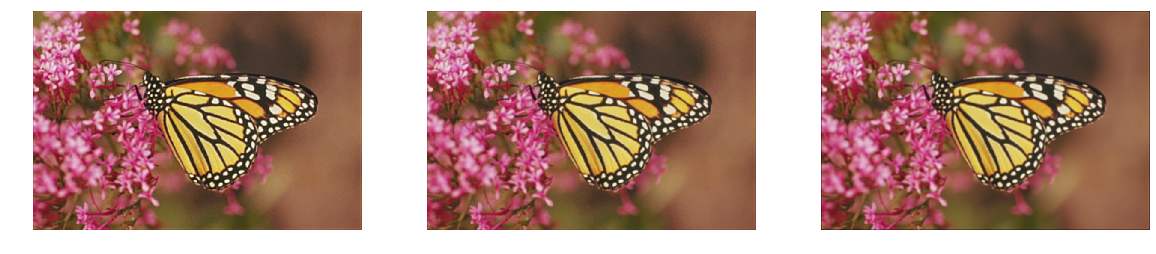

(587.5096556411387, 595.1843635468845, 63.49824248125525)

In [10]:
plt.figure(figsize=(20,15))
plt.subplot(131)
plt.imshow(output_1,cmap='gray')
plt.axis("off")
plt.subplot(132)
plt.imshow(output_2,cmap='gray')
plt.axis("off")
plt.subplot(133)
plt.imshow(output_3,cmap='gray')
plt.axis("off")
plt.show()
getImageVar(output_1),getImageVar(output_2),getImageVar(output_3)

# 图像处理+180776+胡欣毅(C++版)

[c++](c++/hxy.cpp)